### Masive Data Lab Activities

Description : Read and Cleaning Data Sensor HTU21 
File        : T-HTU21-measures.json 
              H-HTU21-measures.csv
              
Name        : Yudi Aditya

In [1]:
import pandas as pd
import numpy as np
import json

### 1. Temperature File (T-DHT11)

In [2]:
# Reading T-HTU21 file
data = []
with open('../data/raw/measures/T-HTU21-measures.json','r') as f:
    for line in f:
        data.append(json.loads(line))

# Make a data frame and convert time data type from string to timestamps.
df1 = pd.DataFrame(data)
df1['time'] = pd.to_datetime(df1['time'])
df1.head()

,sensor,time,value
0,T-HTU21,2017-12-20 12:17:05,25.09
1,T-HTU21,2017-12-20 12:17:07,25.09
2,T-HTU21,2017-12-20 12:17:09,25.09
3,T-HTU21,2017-12-20 12:17:11,25.09
4,T-HTU21,2017-12-20 12:17:13,25.08


In [3]:
type(df1.time[0])

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
# Get General Information regarding data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428383 entries, 0 to 1428382
Data columns (total 3 columns):
sensor    1428383 non-null object
time      1428383 non-null datetime64[ns]
value     1428383 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 32.7+ MB


From information above, the data frame has 1428383 rows and 3 columns. Each column has 1428383 data, there is no missing data. 

In [5]:
# Get sensor's description 
df1.sensor.value_counts()

T-HTU21    1428383
Name: sensor, dtype: int64

In [6]:
# This data has only one sensor, I drop sensor column and rename column value to T_HTU21
new_df1 = df1.drop(['sensor'], axis='columns') 
new_df1.rename(columns= {'value' : 'T_HTU21'}, inplace = True )
new_df1.head()

,time,T_HTU21
0,2017-12-20 12:17:05,25.09
1,2017-12-20 12:17:07,25.09
2,2017-12-20 12:17:09,25.09
3,2017-12-20 12:17:11,25.09
4,2017-12-20 12:17:13,25.08


In [7]:
# Count missing data in each column
new_df1.isnull().sum()

time       0
T_HTU21    0
dtype: int64

In [8]:
#Get statistical information
new_df1.describe()

,T_HTU21
count,1.428383e+06
mean,2.153985e+01
std,2.573268e+00
min,1.508000e+01
25%,2.026000e+01
50%,2.181000e+01
75%,2.334000e+01
max,2.821000e+01


File T-HTU21-measures.json doesn't have any problem. There's no missing data and each column has a same format.

### 2. Humidity File (H-HTU21)

In [9]:
# Reading H-HTU21 file
df2 = pd.read_csv('../data/raw/measures/H-HTU21-measures.csv', parse_dates = ['time'])
df2.head()

,sensor,value,time
0,H-HTU21,28.3,2017-12-20 12:17:05
1,H-HTU21,28.2,2017-12-20 12:17:07
2,H-HTU21,28.1,2017-12-20 12:17:09
3,H-HTU21,28.2,2017-12-20 12:17:11
4,H-HTU21,28.2,2017-12-20 12:17:13


In [10]:
type(df2.time[0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
# Get General Information regarding data frame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428377 entries, 0 to 1428376
Data columns (total 3 columns):
sensor    1428377 non-null object
value     1428377 non-null float64
time      1428377 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 32.7+ MB


There is no missing data on this file. 

In [12]:
# Get General Information regarding data frame
df2.sensor.value_counts()

H-HTU21    1428377
Name: sensor, dtype: int64

In [13]:
# This data has only one sensor, I drop sensor column and rename column value to H_HTU21
new_df2 = df2.drop(['sensor'], axis='columns') 
new_df2.rename(columns= {'value' : 'H_HTU21'}, inplace = True )
new_df2.head()

,H_HTU21,time
0,28.3,2017-12-20 12:17:05
1,28.2,2017-12-20 12:17:07
2,28.1,2017-12-20 12:17:09
3,28.2,2017-12-20 12:17:11
4,28.2,2017-12-20 12:17:13


In [14]:
# Count missing data in each column
new_df2.isnull().sum()

H_HTU21    0
time       0
dtype: int64

File H-HTU21-measures.csv doesn't have any problem. There's no missing data and each column has a same format.

### 3. Merge temperature and humidity data frame

In this section, I'm going to merge two dataframes into one data frame base on the time. After merging two data frames probably founded missing data either on column T_HTU21 or H_HTU21 because there is a difference between time in each data frame. 

In [15]:
# Merge data frame base on time columns
newdf = pd.merge(new_df1, new_df2, on = 'time', how='outer')
# Set time as a index of data frame
newdf.set_index('time', inplace=True)
newdf.head()

,T_HTU21,H_HTU21
time,,
2017-12-20 12:17:05,25.09,28.3
2017-12-20 12:17:07,25.09,28.2
2017-12-20 12:17:09,25.09,28.1
2017-12-20 12:17:11,25.09,28.2
2017-12-20 12:17:13,25.08,28.2


In [16]:
# Get general information
newdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510105 entries, 2017-12-20 12:17:05 to 2018-03-13 11:42:12
Data columns (total 2 columns):
T_HTU21    1428383 non-null float64
H_HTU21    1428377 non-null float64
dtypes: float64(2)
memory usage: 34.6 MB


From information above, the data frame after merging has 1510105 rows and contains temperature and humidity data from 2017-12-20 12:17:05 to 2018-03-13 11:42:12. T_HTU21 and H_HTU21 respectively has 1428383 and 1428377 data. In other words, there is missing data in each column. 

In [17]:
# Count missing data in each column
newdf.isnull().sum()

T_HTU21    81722
H_HTU21    81728
dtype: int64

In [18]:
newdf.iloc[115:125]

,T_HTU21,H_HTU21
time,,
2017-12-20 12:21:07,25.06,28.3
2017-12-20 12:21:09,25.07,28.4
2017-12-20 12:21:11,25.07,28.4
2017-12-20 12:21:13,25.08,28.3
2017-12-20 12:21:15,25.07,NaN
2017-12-20 12:21:18,25.08,28.1
2017-12-20 12:21:20,25.09,28.1
2017-12-20 12:21:22,25.09,28.1
2017-12-20 12:21:24,25.10,28.1


In this case, I use interpolation base on time to handle missing data. These are the reason. 
1. Either temperature or humidity does not have a significant change over time.
2. The difference of time from one row to the next row is not same. 

In [19]:
# Handling missing data using interpolation
newdf.interpolate(method='time', inplace=True)
newdf.iloc[115:130]

,T_HTU21,H_HTU21
time,,
2017-12-20 12:21:07,25.06,28.30
2017-12-20 12:21:09,25.07,28.40
2017-12-20 12:21:11,25.07,28.40
2017-12-20 12:21:13,25.08,28.30
2017-12-20 12:21:15,25.07,28.22
2017-12-20 12:21:18,25.08,28.10
2017-12-20 12:21:20,25.09,28.10
2017-12-20 12:21:22,25.09,28.10
2017-12-20 12:21:24,25.10,28.10


In [20]:
# Get statistical information of data frame
newdf.describe()

,T_HTU21,H_HTU21
count,1.510105e+06,1.510105e+06
mean,2.152765e+01,3.433938e+01
std,2.585292e+00,4.967486e+00
min,1.508000e+01,1.970000e+01
25%,2.025000e+01,3.040000e+01
50%,2.181000e+01,3.440000e+01
75%,2.334000e+01,3.730000e+01
max,2.821000e+01,5.630000e+01


### 4. Data Visualization

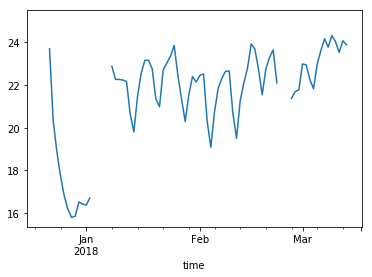

In [21]:
%matplotlib inline
# Visualization the average temperature based on time (day)
newdf.T_HTU21.resample('D').mean().plot()

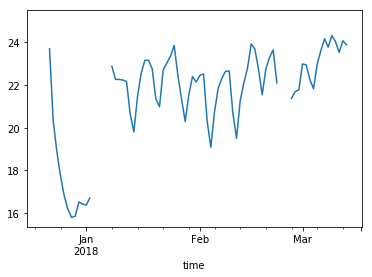

In [22]:
# Visualization the average humidity based on time (day)
newdf.T_HTU21.resample('D').mean().plot()

Note :
There are missing data in temperature and humidity graphs,
it happens because there is no data both in temperature and humidity dataframe 